## New Algorithm calculating Ward from the distance values

In [3]:
from scipy.cluster.hierarchy import dendrogram
# from scipy.spatial.distance import pdist
# from nn_chain_algorithm_standard import standard_nn_chain

# from knn_chain import knn_pdist, knn_chain

import numpy as np

import pstats, cProfile
import pyximport
pyximport.install()

(None, <pyximport._pyximport3.PyxImportMetaFinder at 0x7db7509fa1a0>)

In [1]:
from knn_chain import knn_pdist 

In [4]:
X = np.random.randint(0, 10, size=(1000, 3))

### New knn-chain algorithm

In [5]:
distance_cache = knn_pdist(X)
# 4s

In [30]:
A = knn_chain(distance_cache = distance_cache, n = len(X), k = 3)

### Standard Python implementation of SciPy's nn-chain algorithm

In [29]:
# Note: using Cython implementation --> check whether Cython implementation of knn_pdist can compete 
y = pdist(X)

In [31]:
B = standard_nn_chain(y, len(X))

### Timing

1. knn-chain

In [23]:
for i in range(10):
    cProfile.runctx("knn_chain(distance_cache = distance_cache, n = len(X), k = 3)", globals(), locals(), "Profile.prof")

In [24]:
s = pstats.Stats("Profile.prof")
s.strip_dirs().sort_stats("time").print_stats()

Thu Jun 20 09:03:57 2024    Profile.prof

         10520703 function calls in 3.869 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2034838    0.651    0.000    1.443    0.000 knn_chain.py:8(_make_key)
     2055    0.550    0.000    2.396    0.001 knn_chain.py:101(get_top_k)
  1000117    0.489    0.000    1.173    0.000 knn_chain.py:22(exists)
  1034721    0.460    0.000    1.541    0.000 knn_chain.py:18(get_distance)
  2034838    0.420    0.000    0.420    0.000 {built-in method builtins.min}
  2034838    0.372    0.000    0.372    0.000 {built-in method builtins.max}
  1034721    0.323    0.000    0.323    0.000 {method 'get' of 'dict' objects}
     2995    0.255    0.000    1.428    0.000 knn_chain.py:146(update_distance_cache)
  1039802    0.074    0.000    0.074    0.000 {built-in method builtins.len}
    27002    0.054    0.000    0.110    0.000 fromnumeric.py:40(_wrapit)
    27002    0.031    0.000    0.145    0.00

2. nn-chain

In [26]:
for i in range(10):
    cProfile.runctx("standard_nn_chain(y, len(X))", globals(), locals(), "Profile.prof")

In [27]:
t = pstats.Stats("Profile.prof")
t.strip_dirs().sort_stats("time").print_stats()

Thu Jun 20 09:09:29 2024    Profile.prof

         3254942 function calls in 29.176 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  2753424   17.839    0.000   17.839    0.000 nn_chain_algorithm_standard.py:49(condensed_index)
        1    9.601    9.601   29.176   29.176 nn_chain_algorithm_standard.py:61(standard_nn_chain)
   498501    1.728    0.000    1.728    0.000 nn_chain_algorithm_standard.py:45(new_dist)
     1998    0.005    0.000    0.005    0.000 nn_chain_algorithm_standard.py:21(find)
        1    0.002    0.002    0.008    0.008 nn_chain_algorithm_standard.py:32(label)
      999    0.001    0.000    0.001    0.000 nn_chain_algorithm_standard.py:13(merge)
        1    0.000    0.000   29.176   29.176 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'argsort' of 'numpy.ndarray' objects}
        2    0.000    0.000    0.000    0.000 numeric.py:136(ones)
        1    0.000    

--> ensure correctness 

--> begin implementation in cython ?

### Dendrograms

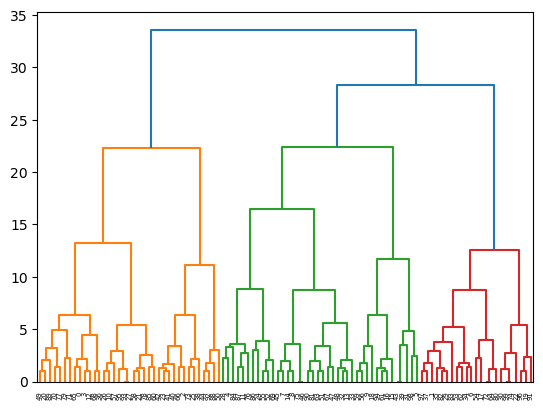

In [8]:
dendrogram(A);

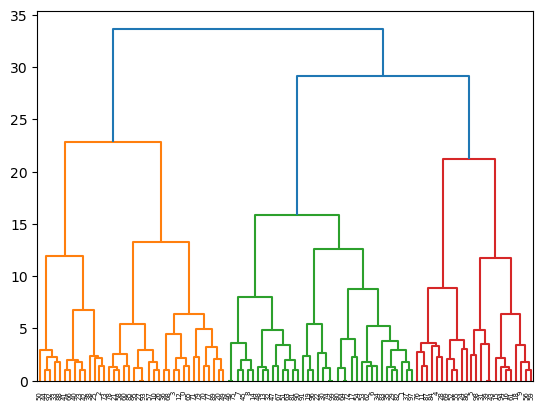

In [9]:
dendrogram(B);

In [1]:
import numpy as np
x = [3,5]
print(np.argmin(x))
print(not np.argmin(x))

0
True


In [4]:
2%2

0